In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Establecemos la paleta de colores de VIU
viu_colors = ['#dd3c12', '#e46242', '#ec8a71', '#f3b1a1', '#f4c4b8', '#fdebe7']

In [3]:
# Cargar datos
data = pd.read_csv('../datasets/20160923_global_crisis_data.csv', sep=";")
data.sample(10)

,Year,Banking_Crisis,Systemic_Crisis,Domestic_Debt_In_Default,Sovereign_External_Debt_In_Default,Currency_Crisis,Inflation_Crisis
2997,2012,0.0,0.0,0.0,0.0,0,0.0
1247,1987,0.0,0.0,0.0,0.0,0,0.0
2809,2010,0.0,0.0,0.0,1.0,0,0.0
1670,1993,0.0,0.0,0.0,0.0,0,0.0
187,1972,0.0,0.0,0.0,0.0,0,0.0
2937,2011,0.0,0.0,0.0,0.0,0,1.0
796,1981,0.0,0.0,0.0,1.0,0,0.0
974,1983,0.0,0.0,0.0,0.0,1,0.0
332,1974,0.0,0.0,0.0,0.0,0,0.0
2652,2007,0.0,0.0,0.0,0.0,0,0.0


In [4]:
# Calculamos los acumulados por año para cada tipo de crisis
totales = pd.DataFrame()
totales['TotalBanking'] = data.groupby('Year')['Banking_Crisis'].agg('sum')
totales['TotalDomestic'] = data.groupby('Year')['Domestic_Debt_In_Default'].agg('sum')
totales['TotalSovereign'] = data.groupby('Year')['Sovereign_External_Debt_In_Default'].agg('sum')
totales['TotalCurrency'] = data.groupby('Year')['Currency_Crisis'].agg('sum')

In [5]:
totales.sample(10)

,TotalBanking,TotalDomestic,TotalSovereign,TotalCurrency
Year,,,,
2001,11.0,4.0,8.0,10
1993,20.0,3.0,18.0,23
2004,4.0,2.0,10.0,3
1975,1.0,2.0,4.0,12
1976,3.0,3.0,4.0,14
2002,8.0,3.0,9.0,10
1991,22.0,2.0,20.0,23
2005,3.0,2.0,10.0,14
1986,13.0,4.0,25.0,22


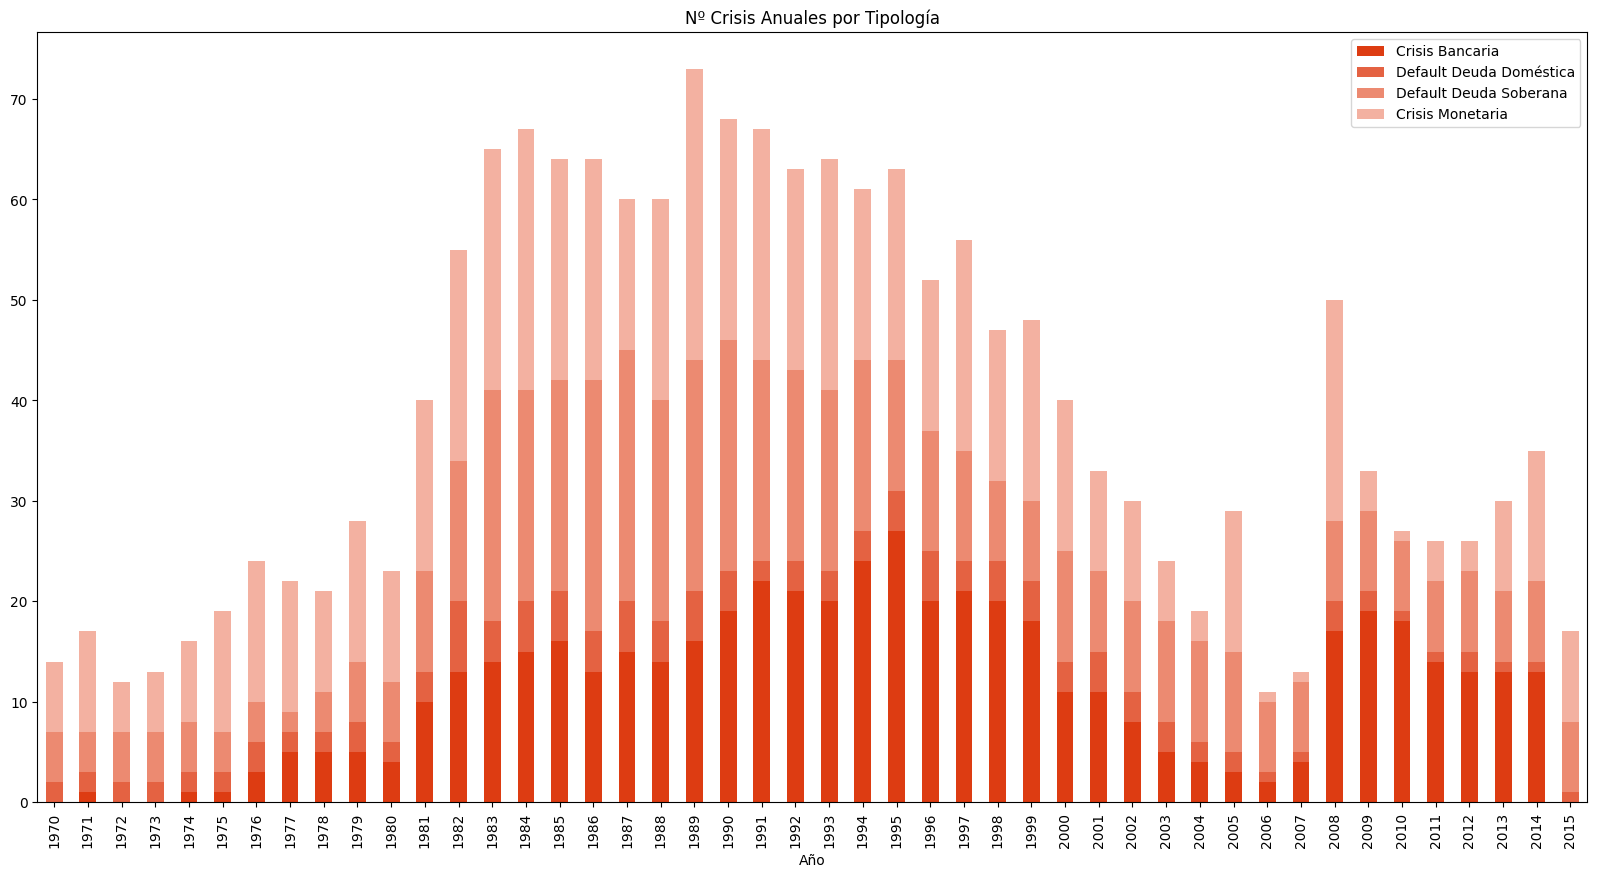

In [6]:
# Mostramos el gráfico de barras para los distintos tipos de crisis
totales.plot(y=['TotalBanking', 'TotalDomestic', 'TotalSovereign', 'TotalCurrency'],
             kind="bar", stacked=True, rot=90, figsize=(20,10), xlabel='Año', title='Nº Crisis Anuales por Tipología',
             color=viu_colors)
plt.legend(['Crisis Bancaria', 'Default Deuda Doméstica', 'Default Deuda Soberana', 'Crisis Monetaria'])
plt.show()

In [7]:
data2 = pd.read_csv('../datasets/DatasetLimpio.csv', sep=";")
data2.sample(10)

,Country,Year,Code,Crisis,Advanced Market,Emerging Market,LIDC,Small Developing State,Current account balance (percent of GDP),Current account balance (U.S. dollars),...,Real interest rate (%),Short-term debt (% of total external debt),Short-term debt (% of total reserves),Total debt service (% of GNI),Total natural resources rents (% of GDP),Total reserves in months of imports,Total reserves minus gold (current US$),Trade (% of GDP),"Unemployment, total (% of total labor force) (national estimate)",Urban population (% of total population)
5177,Montenegro,1995,MNE,0,0,0,0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"53,365"
739,Belize,1973,BLZ,2,0,0,0,1,0,0,...,NaN,0,NaN,"0,6519573029","1,321847133",NaN,NaN,NaN,NaN,"50,488"
8209,United Kingdom,1991,GBR,2,1,0,0,0,"-1,042","-13,023",...,"4,957660347",NaN,NaN,NaN,"0,5104092311","1,493354009",41891984609,"45,29980693","8,55","78,112"
4445,Lithuania,1999,LTU,0,1,0,0,0,"-10,883","-1,194",...,NaN,NaN,NaN,NaN,"0,8351141289","2,924963577",1195011402,"74,82149516","13,388","67,046"
1870,Cote D'Ivoire,2000,CIV,2,0,0,1,0,"-1,625","-0,241",...,NaN,"7,5918",NaN,"10,49832055","2,862114911",NaN,NaN,"54,96399163",NaN,"43,155"
4379,Libya,1979,LBY,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,"7,686889209",6344362846,NaN,NaN,"68,696"
8507,Vietnam,2013,VNM,0,0,1,0,0,"3,64","7,744",...,"6,089708704","18,3688","46,99733831","2,208068218","5,913311535","2,146521568",25893489673,"130,8463553","1,316","32,429"
4418,Lithuania,1972,LTU,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"51,968"
505,"Bahamas, The",2015,BHS,0,0,0,0,1,"-12,664","-1,478",...,"-0,5334517739",NaN,NaN,NaN,"0,01426292313","2,296638521","895475136,3","73,48473815",12,"82,746"
3871,Kenya,1977,KEN,2,0,0,1,0,0,0,...,"-5,902336362","18,2652","57,62813079","7,51791022","5,030422483","3,864162115","522391861,4","66,55196516",NaN,"14,112"


In [8]:
# Nos quedamos únicamente con los registros asociados a años de crisis
dataAux = data2[data2['Crisis']==2]

# Calculamos los acumulados de crisis por año para cada tipo de pais
totales2 = pd.DataFrame()
totales2['TotalAdvanced'] = dataAux.groupby('Year')['Advanced Market'].agg('sum')
totales2['TotalEmerging'] = dataAux.groupby('Year')['Emerging Market'].agg('sum')
totales2['TotalLIDC'] = dataAux.groupby('Year')['LIDC'].agg('sum')

In [9]:
display(totales2)

,TotalAdvanced,TotalEmerging,TotalLIDC
Year,,,
1970,1,1,0
1971,2,9,8
1972,0,8,9
1973,1,9,13
1974,8,10,10
1975,6,7,15
1976,5,8,16
1977,6,13,18
1978,6,17,21


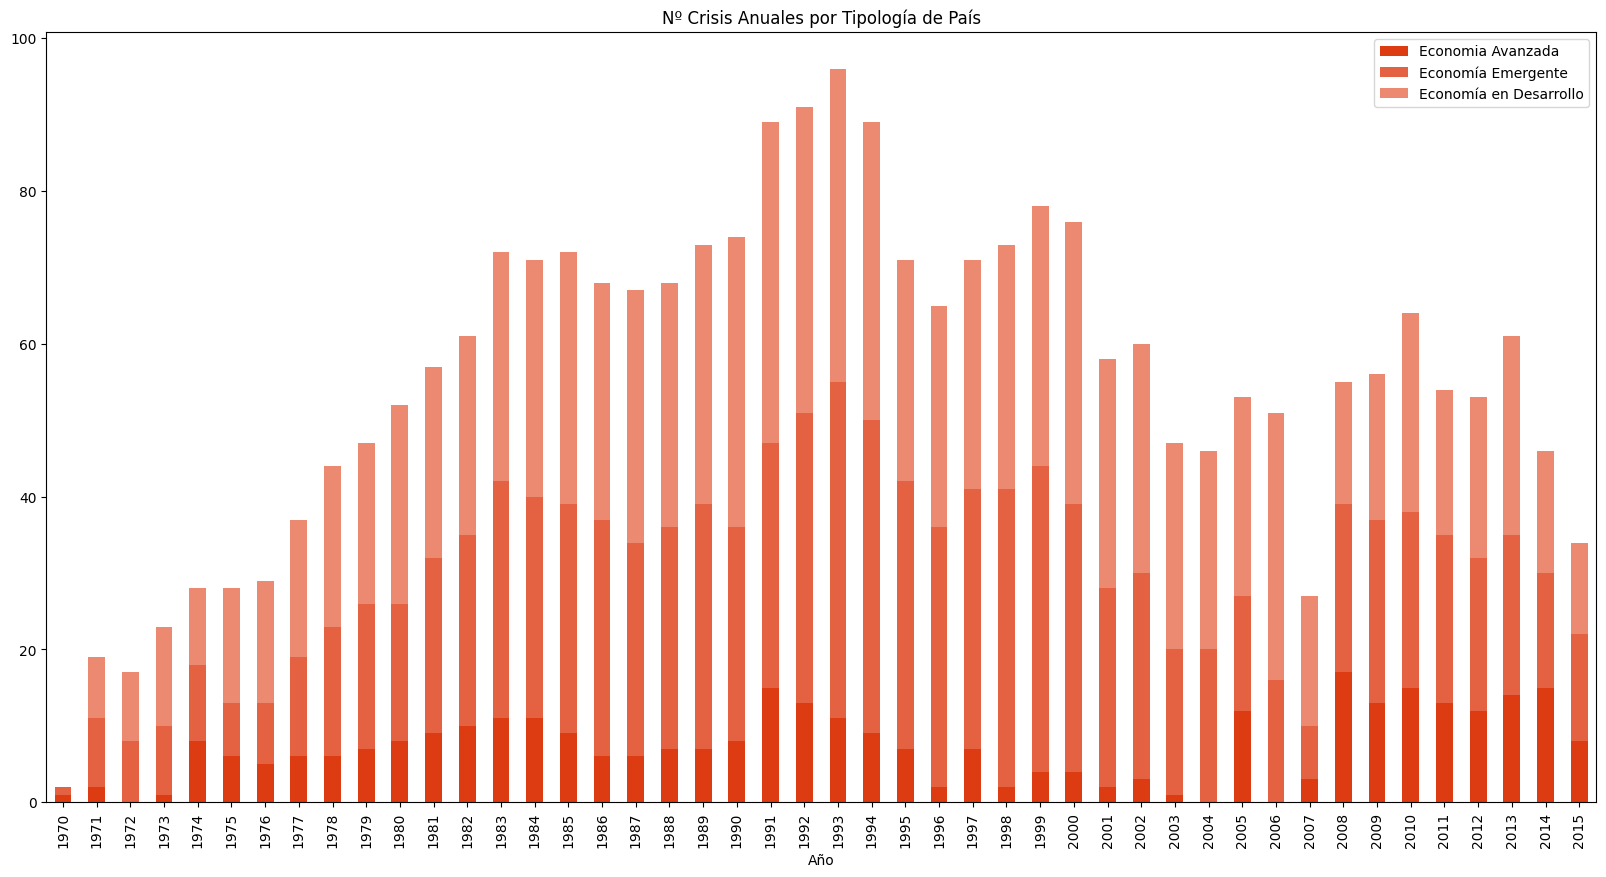

In [10]:
# Mostramos el gráfico de barras para los distintos tipos de país
totales2.plot(y=['TotalAdvanced', 'TotalEmerging', 'TotalLIDC'],
              kind="bar", stacked=True, rot=90, figsize=(20,10), xlabel='Año',
              title='Nº Crisis Anuales por Tipología de País', color=viu_colors)
plt.legend(['Economia Avanzada', 'Economía Emergente', 'Economía en Desarrollo'])
plt.show()

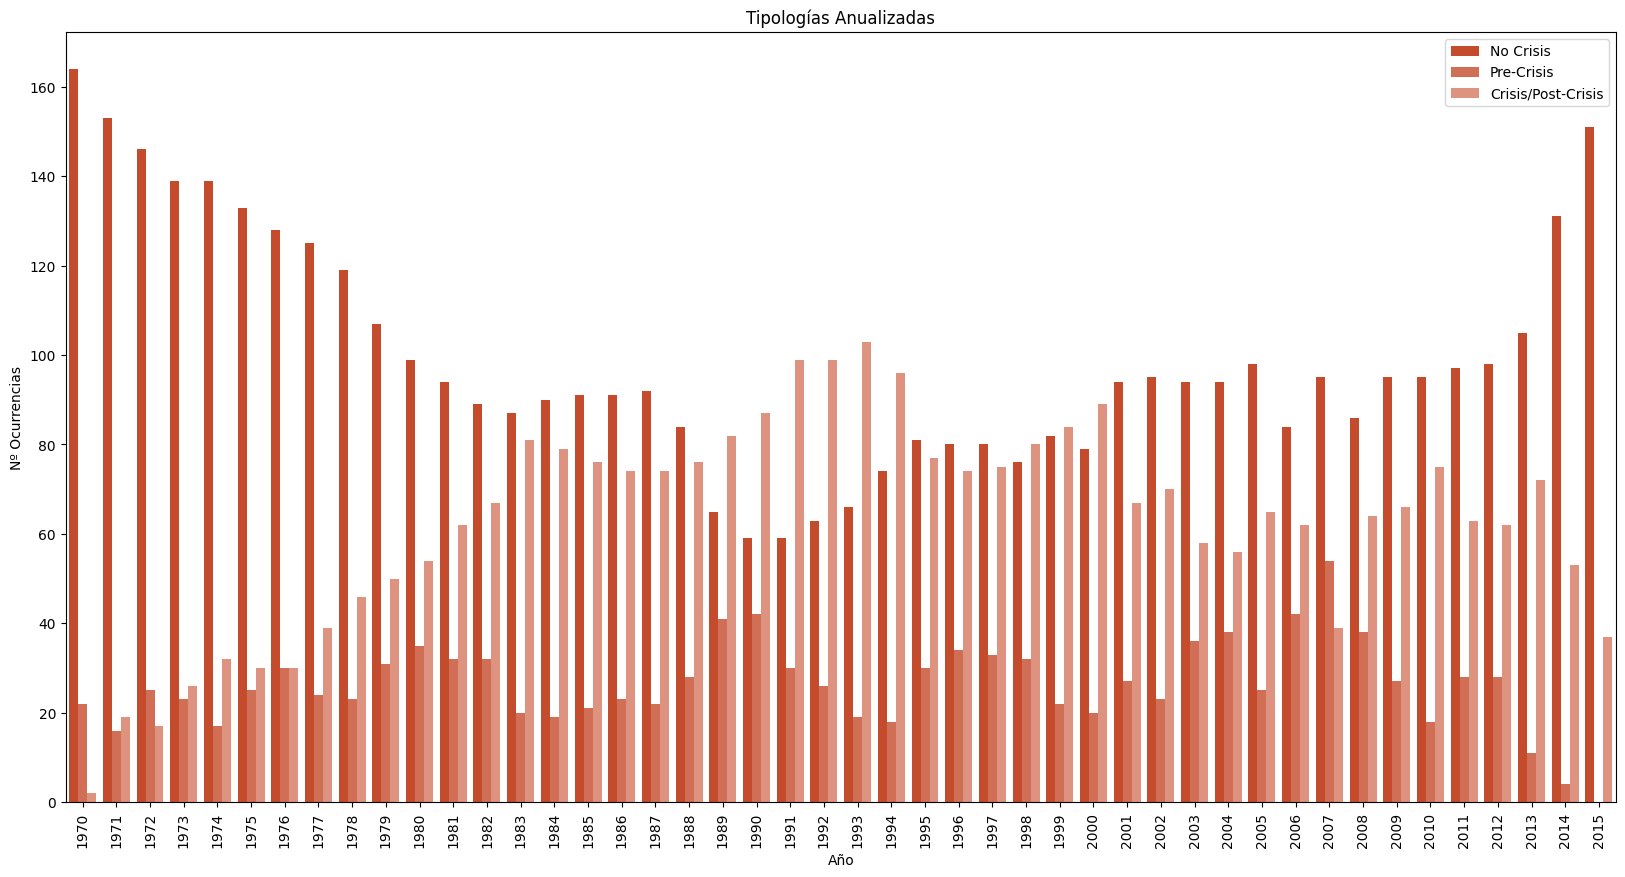

In [11]:
fig,ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(data2[['Year', 'Crisis']], x='Year', hue='Crisis', palette=sns.color_palette(viu_colors, 3)).set(title='Tipologías Anualizadas')
plt.xlabel('Año')
plt.ylabel('Nº Ocurrencias')
plt.xticks(rotation=90)
plt.legend(['No Crisis', 'Pre-Crisis', 'Crisis/Post-Crisis'])
plt.show()

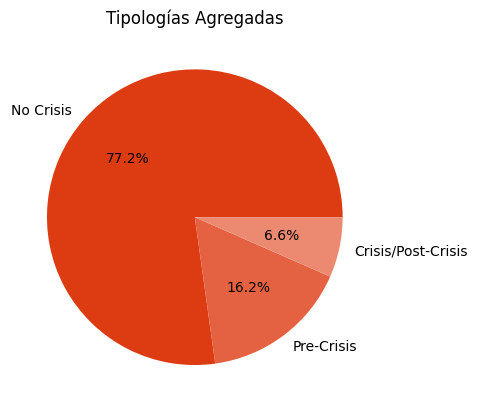

In [5]:
# Cargar datos
data3 = pd.read_csv('../datasets/otros/data_con_periodos_excepcionales.csv', sep=";")

aggregates = data3['crisisJST'].value_counts()
plt.pie(aggregates,labels = ['No Crisis', 'Pre-Crisis', 'Crisis/Post-Crisis'], colors=sns.color_palette(viu_colors, 3), autopct='%.1f%%')
plt.title('Tipologías Agregadas')
plt.show()

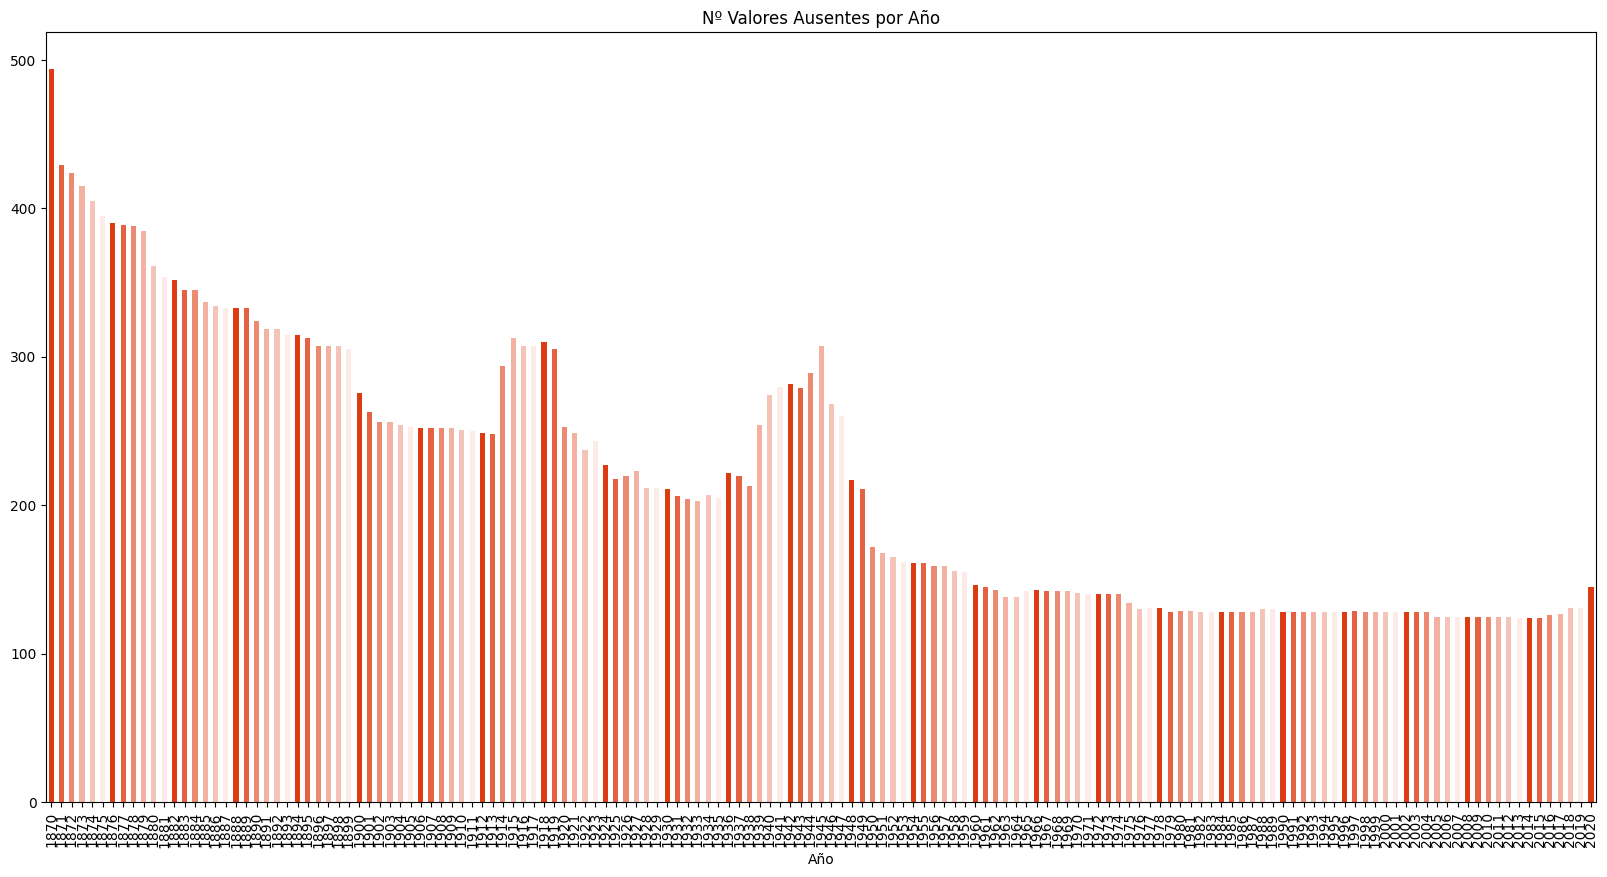

In [13]:
data4 = pd.read_csv('../datasets/JSTdatasetR6.csv', sep=';', na_values='', decimal=',')
pd.set_option('display.max_rows', 500)
agrupacion = data4.groupby('year').apply(lambda x: (x.isnull().sum(axis=1)).sum())

agrupacion.plot(kind="bar", stacked=True, rot=90, figsize=(20,10), xlabel='Año', title='Nº Valores Ausentes por Año',
             color=viu_colors)
plt.show()


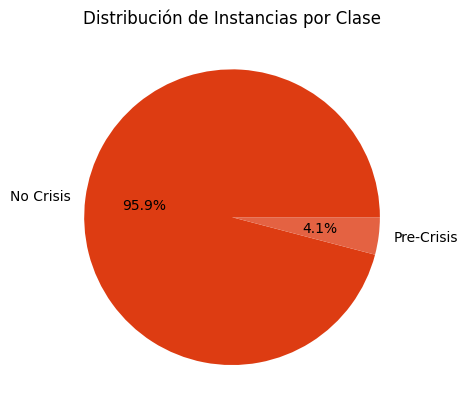

In [5]:
# Cargar datos
data5 = pd.read_csv('../datasets/finales/data_final.csv', sep=";")

aggregates = data5['crisisJST'].value_counts()
plt.pie(aggregates,labels = ['No Crisis', 'Pre-Crisis'], colors=sns.color_palette(viu_colors, 3), autopct='%.1f%%')
plt.title('Distribución de Instancias por Clase')
plt.show()

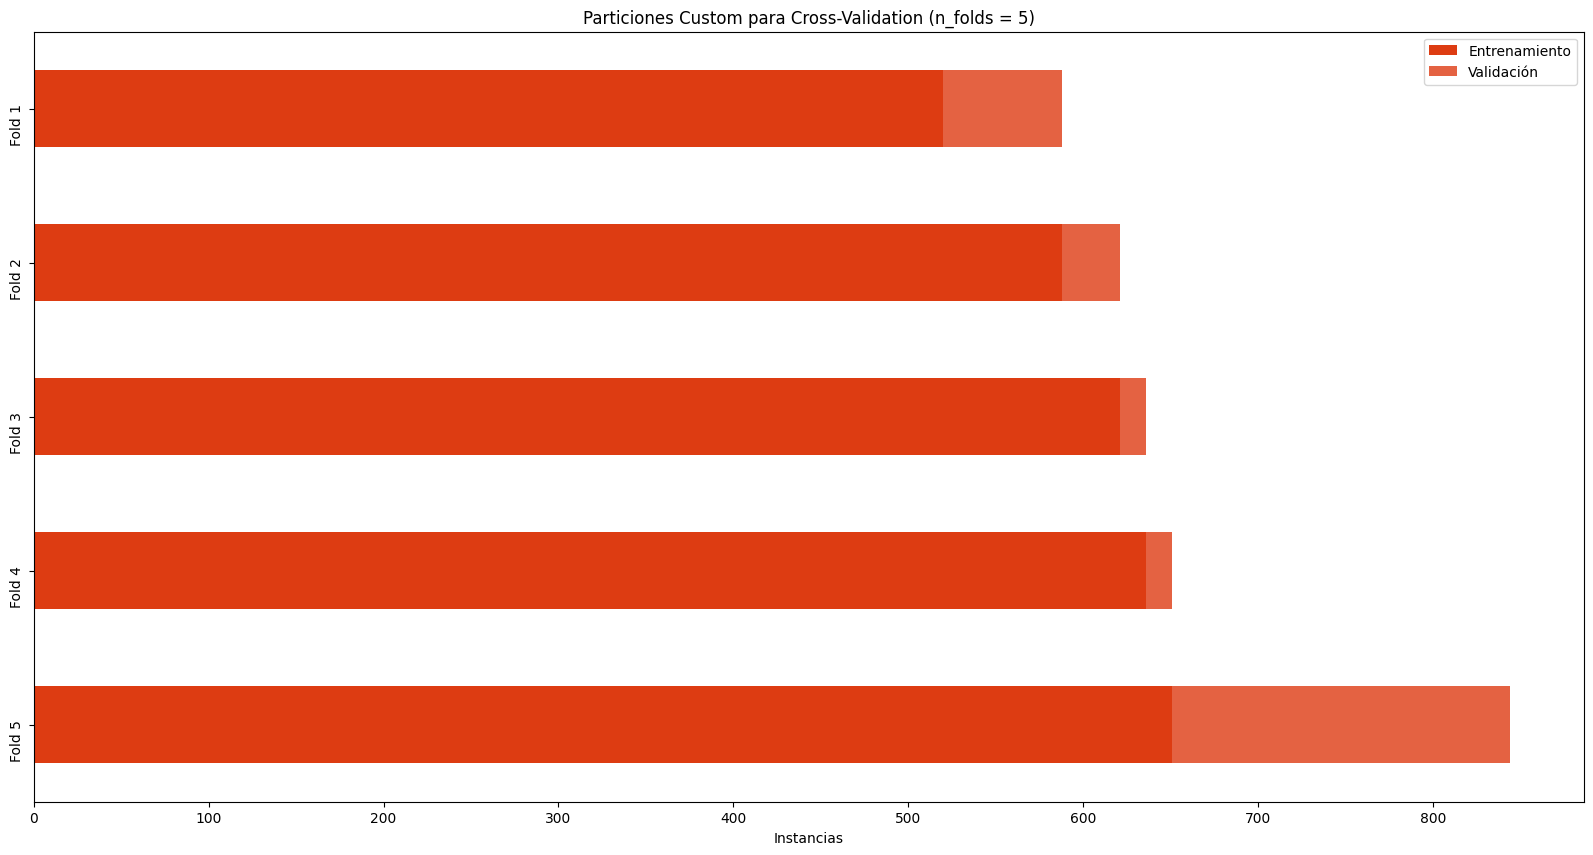

In [5]:
data6 = pd.DataFrame({'Entrenamiento' : [651, 636, 621, 588, 520], 'Validación' : [193, 15, 15, 33, 68]}, index = ['Fold 5', 'Fold 4', 'Fold 3', 'Fold 2', 'Fold 1'])
data6.plot(y=['Entrenamiento', 'Validación'],
             kind="barh", stacked=True, rot=90, figsize=(20,10), xlabel='Instancias', title='Particiones Custom para Cross-Validation (n_folds = 5)',
             color=viu_colors)
plt.legend(['Entrenamiento', 'Validación'])
plt.show()